In [1]:
#adicionar 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score



In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import requests
import io

In [4]:
import os

cwd = os.getcwd() 
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\lanur\\AppData\\Local\\Programs\\Microsoft VS Code': ['bin', 'chrome_100_percent.pak', 'chrome_200_percent.pak', 'Code.exe', 'Code.VisualElementsManifest.xml', 'd3dcompiler_47.dll', 'ffmpeg.dll', 'icudtl.dat', 'libEGL.dll', 'libGLESv2.dll', 'locales', 'policies', 'resources', 'resources.pak', 'snapshot_blob.bin', 'tools', 'unins000.dat', 'unins000.exe', 'unins000.msg', 'v8_context_snapshot.bin', 'vk_swiftshader.dll', 'vk_swiftshader_icd.json', 'vulkan-1.dll']


In [5]:
url = 'https://raw.githubusercontent.com/catarinatomasr/projectoEDSB/main/HR_DS.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
data = df
#df = pd.read_csv('https://github.com/catarinatomasr/projectoEDSB/blob/main/HR_DS.csv')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
pd.set_option('display.max_columns', 40)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Definir perguntas para responder
Story 

Data Preparation/Clean

In [8]:
data.describe()
#Checking the Null Values
pd.set_option('display.max_rows', 200)
#data.isnull().sum() #no null values
#data.info()

#check for  duplicate records and have the unique records to be included into your dataset:
#data[data.duplicated()] #zero duplicated

In [9]:
#Over18 : ['Y']
#Y    1470
#so tem um unico valor, por isso vou apagar por ser inutil
#data['StandardHours'].unique() tambem so tem 1 valor, que é sempre 80
#data['EmployeeCount'].unique() tambem so tem 1 valor, que é 1

#não trazem valor 

data=data.drop('Over18', axis=1)
data=data.drop('StandardHours', axis=1)
data=data.drop('EmployeeCount', axis=1)

In [10]:
#ver os data types e ver os seus valores unicos

for column in data.columns:
    if data[column].dtype==object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_______________________________________________________________')


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_______________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________________________________
Gender : ['Fema

In [11]:
#transformar as colunas que não sao numericas, em numericas pois os modelos n aceitam colunas texto
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.int64:
            continue
    data[column]=LabelEncoder().fit_transform(data[column])

In [12]:
turnover_Summary = data.groupby('Attrition')
turnover_Summary.mean()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1027.656123,2.771290,0.593674,65.952149,2.770479,2.145985,4.386050,2.778589,1.045418,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1010.345992,2.464135,0.632911,65.573840,2.518987,1.637131,4.835443,2.468354,1.367089,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Analise descritiva dos dados-Gráficos


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

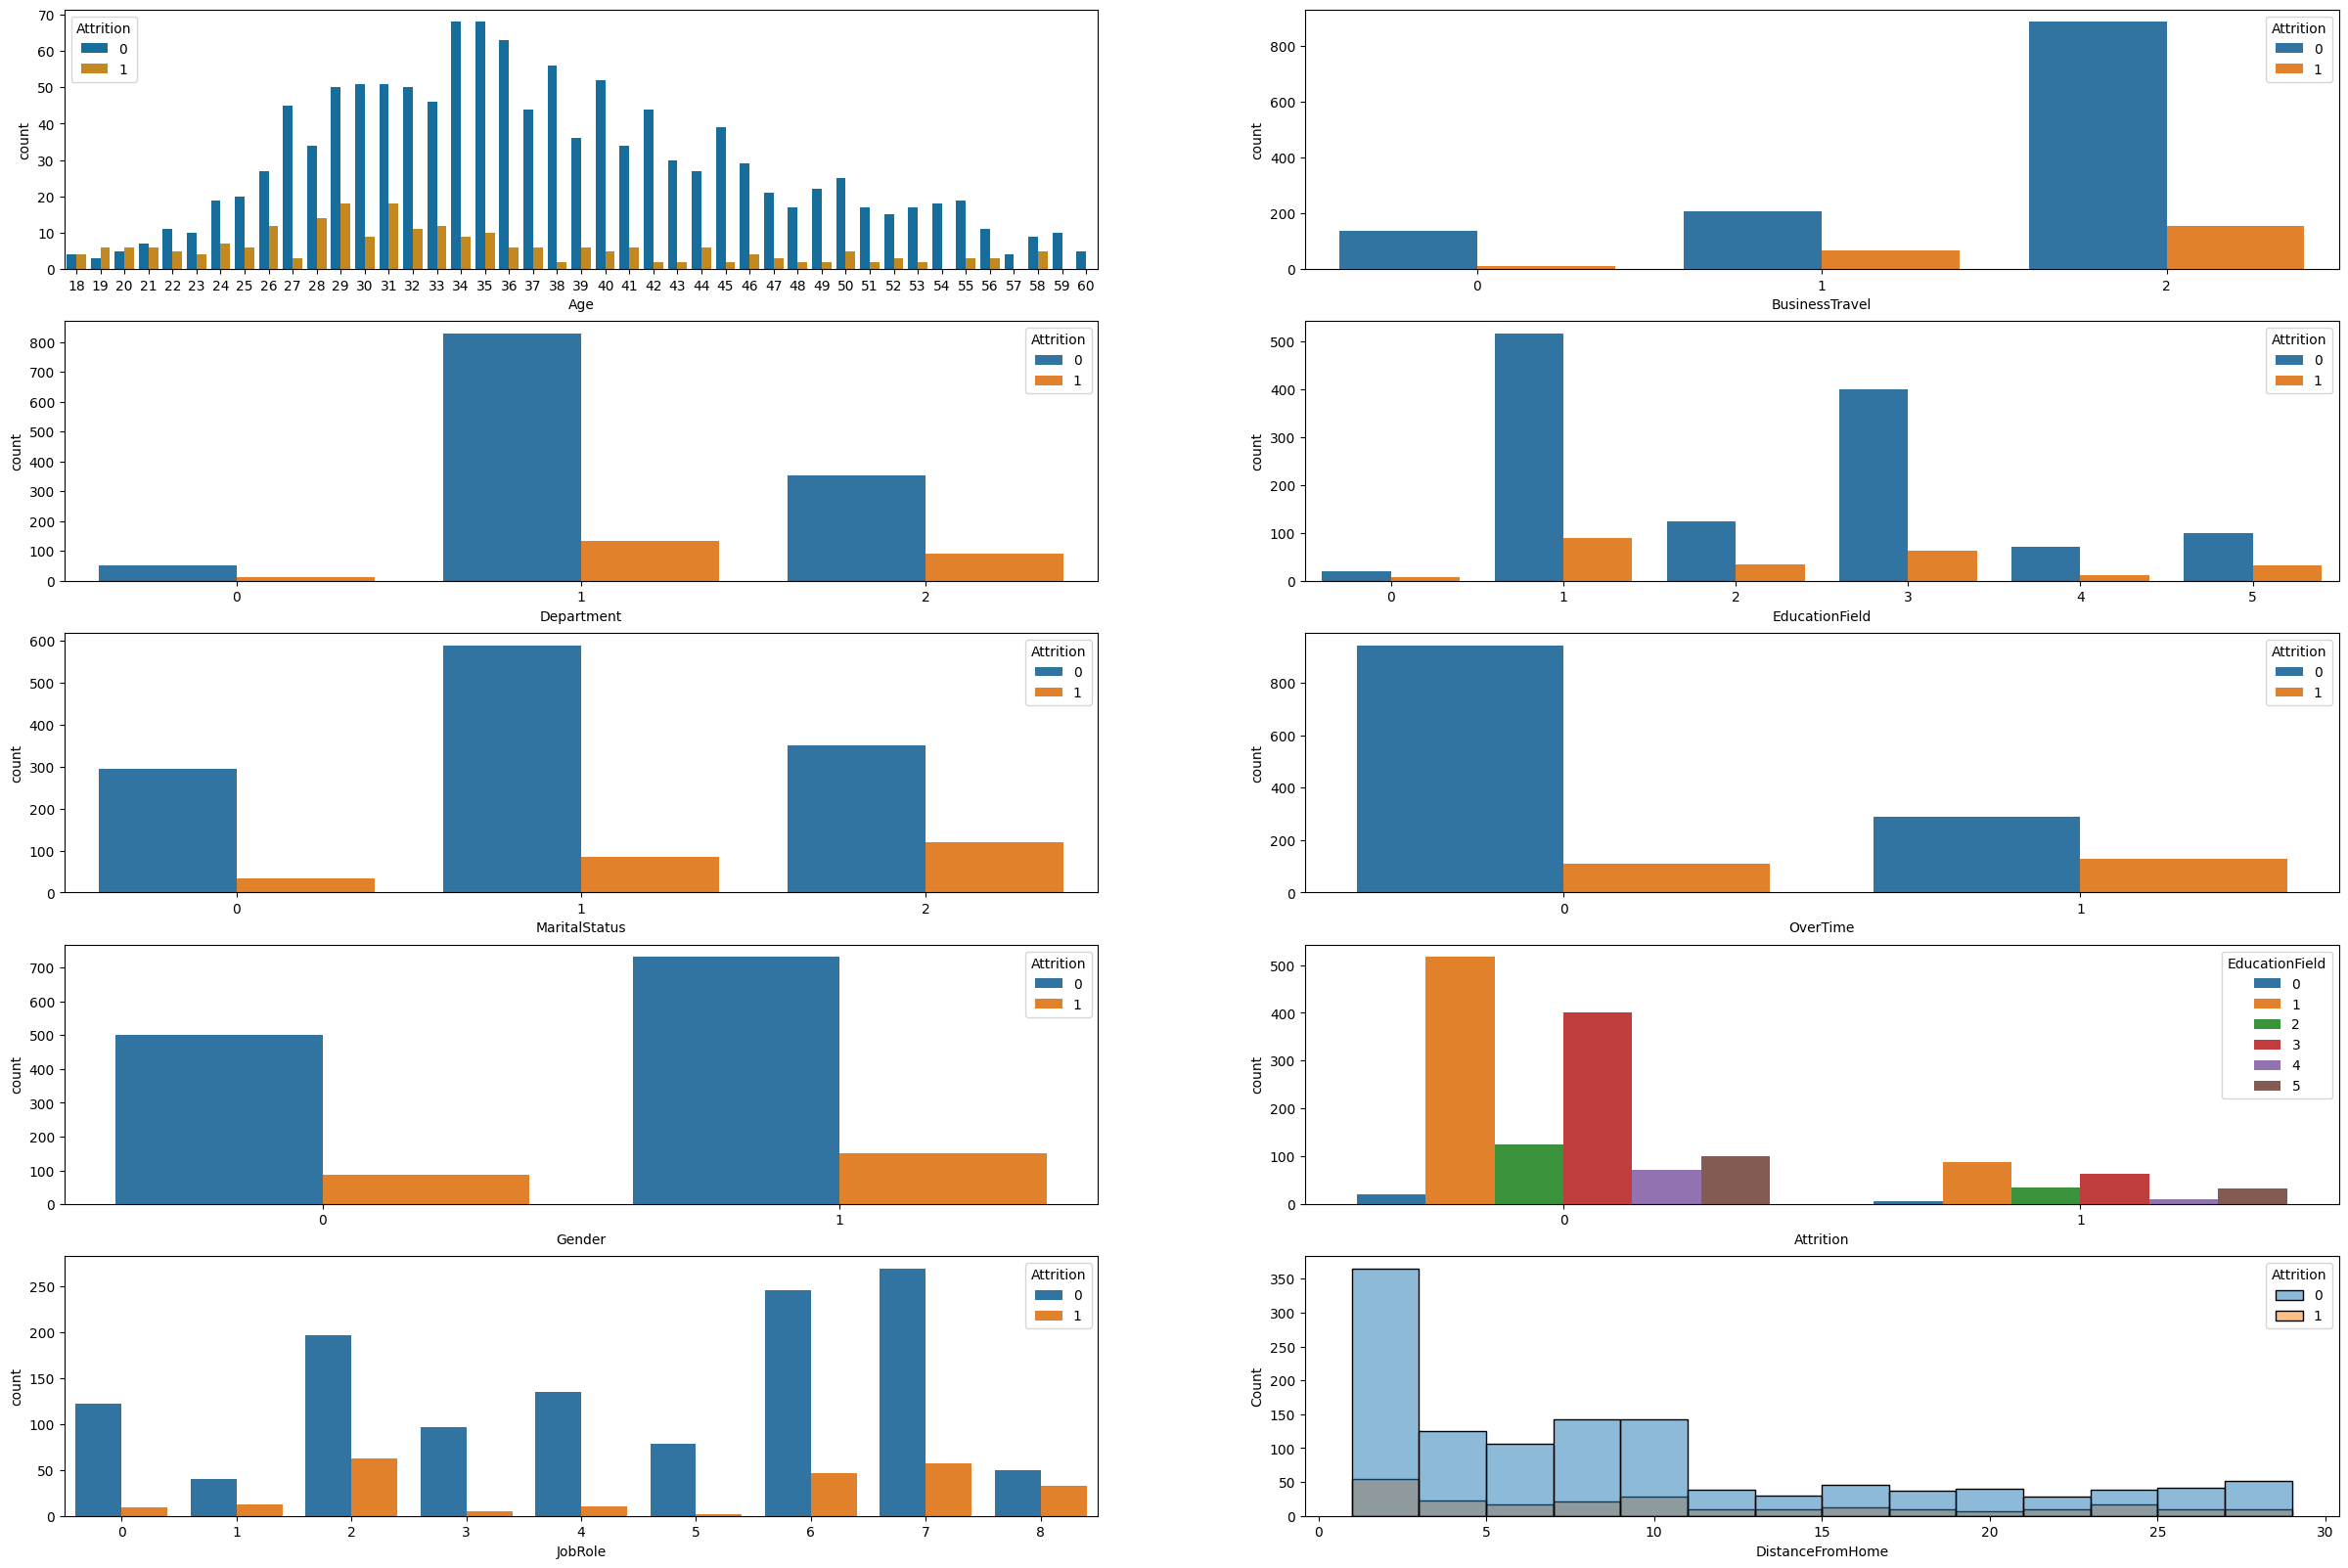

In [13]:
#Attrition em função das variaveis categoricas
fig, axes = plt.subplots(5,2, figsize = (30,20))
sns.countplot(ax = axes[0,0], data = data, x = 'Age', hue='Attrition',palette='colorblind')
sns.countplot(ax = axes[0,1],hue=data.Attrition, x=data.BusinessTravel)
sns.countplot(ax = axes[1,0],hue=data.Attrition, x=data.Department)
sns.countplot(ax = axes[1,1],hue=data.Attrition, x=data.EducationField)
sns.countplot(ax = axes[2,0],hue=data.Attrition, x=data.MaritalStatus)
sns.countplot(ax = axes[2,1],hue=data.Attrition, x=data.OverTime)
sns.countplot(ax = axes[3,0],hue=data.Attrition, x=data.Gender)
sns.countplot(ax = axes[3,1],x=data.Attrition, hue=data.EducationField)
sns.countplot(ax = axes[4,0],x='JobRole', hue='Attrition', data=data)\
sns.histplot(ax = axes[4,1],hue=data.Attrition, x=data.DistanceFromHome)


In [ ]:
sns.countplot( data = data, x = 'Age', hue='Attrition',palette='colorblind')

<AxesSubplot:>

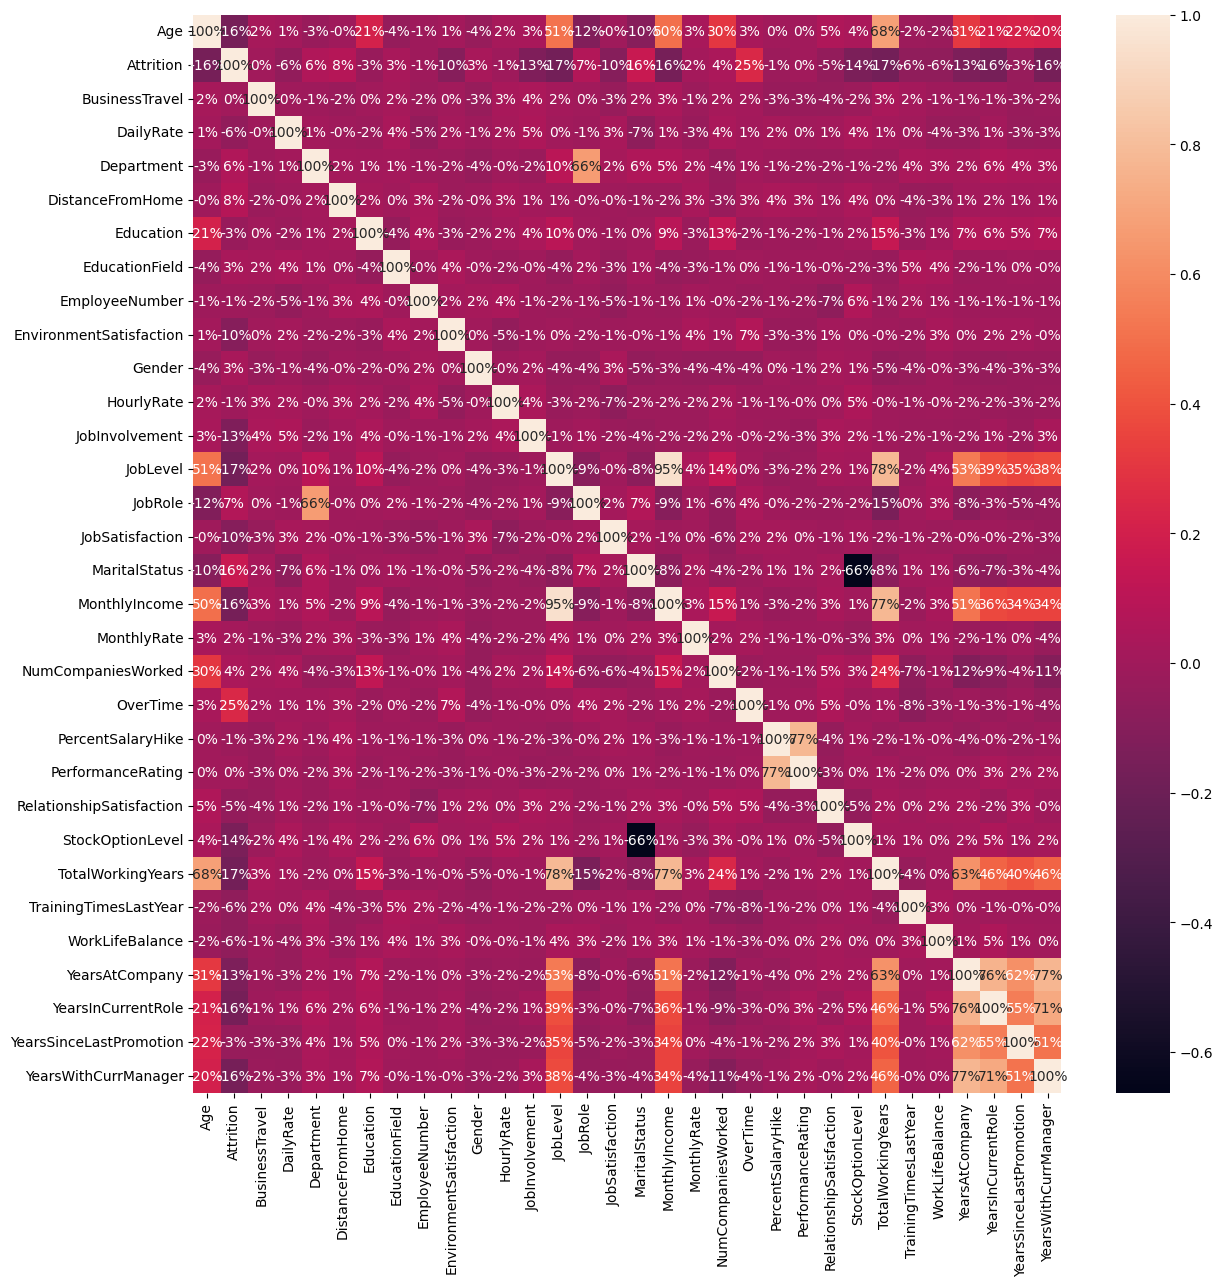

In [14]:
# ver a correlação dos dados
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='0.0%')

# ML-Clustering/Unsupervising

#Kmeans

In [15]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\lanur\AppData\Local\Temp\ipykernel_54724\360305055.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [16]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
data[['Age_T', 'Attrition_T', 'BusinessTravel_T', 'DailyRate_T', 'Department_T',
       'DistanceFromHome_T', 'Education_T', 'EducationField_T', 'EmployeeNumber_T',
       'EnvironmentSatisfaction_T', 'Gender_T', 'HourlyRate_T', 'JobInvolvement_T',
       'JobLevel_T', 'JobRole_T', 'JobSatisfaction_T', 'MaritalStatus_T',
       'MonthlyIncome_T', 'MonthlyRate_T', 'NumCompaniesWorked_T', 'OverTime_T',
       'PercentSalaryHike_T', 'PerformanceRating_T', 'RelationshipSatisfaction_T',
       'StockOptionLevel_T', 'TotalWorkingYears_T', 'TrainingTimesLastYear_T',
       'WorkLifeBalance_T', 'YearsAtCompany_T', 'YearsInCurrentRole_T',
       'YearsSinceLastPromotion_T', 'YearsWithCurrManager_T']]=scaler.fit_transform(data[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']])

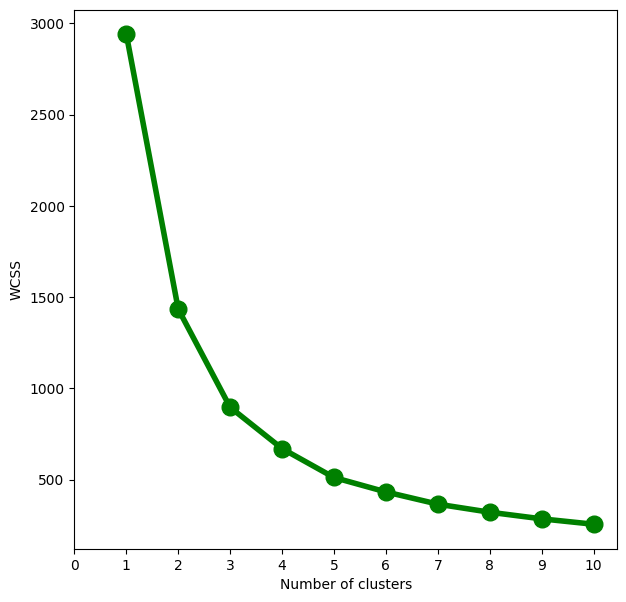

In [19]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
x = data.loc[:,['Age_T','MonthlyIncome_T']].values
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)

In [21]:
kmeans.fit(data[['Age_T','MonthlyIncome_T']])

KMeans(n_clusters=4)

In [22]:
data['kmeans_4']=kmeans.labels_

In [ ]:
plt.scatter(x=data['Age'],y=data['MonthlyIncome'],c=data['kmeans_4'])
plt.xlabel("Age ")
plt.ylabel("MonthlyIncome")
plt.legend()
plt.show()

# ML-Modelo Preditivo



In [ ]:

# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
#from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [ ]:
#pip install -chart_studio

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'hart_studio'


In [ ]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [ ]:

# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobLevel_T,JobRole_T,JobSatisfaction_T,MaritalStatus_T,MonthlyIncome_T,MonthlyRate_T,NumCompaniesWorked_T,OverTime_T,PercentSalaryHike_T,PerformanceRating_T,RelationshipSatisfaction_T,StockOptionLevel_T,TotalWorkingYears_T,TrainingTimesLastYear_T,WorkLifeBalance_T,YearsAtCompany_T,YearsInCurrentRole_T,YearsSinceLastPromotion_T,YearsWithCurrManager_T,kmeans_4
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,...,-0.057788,1.032716,1.153254,1.236820,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,3
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,...,-0.057788,0.626374,-0.660853,-0.133282,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,2
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,...,-0.961486,-0.998992,0.246200,1.236820,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,3
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,...,-0.961486,0.626374,0.246200,-0.133282,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,...,-0.961486,-0.998992,-0.660853,-0.133282,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,1


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,1,0,64,2,1,7,3,2,809,999,8,0,1,0,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,0,12,1,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,3,1,62,1,0,2,2,2,62,18,6,0,1,4,0,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,3,0,26,2,0,6,2,1,313,1228,1,0,1,0,0,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,0,1,10,2,0,2,1,1,399,846,9,0,0,1,0,3,0,1,6,3,2,2,2,2,2


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['EmployeeNumber','Over18','StandardHours'])

In [ ]:
#df=df.drop(columns = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
#       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
#       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
#       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
#       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
#       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
#       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#       'YearsSinceLastPromotion', 'YearsWithCurrManager','kmeans_4','Attrition_T']  )

## Split de data

In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

## Scale fit do DF para treino

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast = 'float')

df.head()
#X = scale.fit_transform(X)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1.0,0.590048,0.713914,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.730873,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.032716,1.153254,1.236820,0.396200,0.703814,2.125136,0.0,1.591746,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421735,-2.171982,-2.493820,-0.163801,-0.063296,-0.679146,0.245834
1,1.322365,0.0,-0.913194,-1.302446,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.728516,0.254625,0.816497,-0.240677,-1.026167,-0.057788,0.626374,-0.660853,-0.133282,0.069401,1.502965,-0.678049,0.0,-0.628241,2.129306,2.346151,1.191438,0.0,0.241988,-0.164441,0.155707,0.338096,0.497250,0.764998,-0.368715,0.806541
2,0.008343,1.0,0.590048,1.428124,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.726160,1.169781,0.816497,1.284725,-1.026167,-0.961486,-0.998992,0.246200,1.236820,-1.525991,-1.679064,1.324226,0.0,1.591746,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550382,0.155707,0.338096,-1.155378,-1.167687,-0.679146,-1.155935
3,-0.429664,0.0,-0.913194,1.487313,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.723803,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.626374,0.246200,-0.133282,-0.880114,1.260062,-0.678049,0.0,1.591746,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421735,0.155707,0.338096,0.166724,0.764998,0.252146,-1.155935
4,-1.086676,0.0,0.590048,-0.517210,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.721447,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.998992,-0.660853,-0.133282,-0.658818,0.332172,2.525591,0.0,-0.628241,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.679030,0.155707,0.338096,-0.824853,-0.615492,-0.058285,-0.595227


## dataset para treino

In [ ]:
target = df['Attrition'].copy()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df,target, test_size = 0.25, random_state = 7, stratify= target)
print('Number transactions X_train dataset: ', X_train.shape)
print('Number transactions Y_train dataset: ', Y_train.shape)
print('Number transactions X_test dataset: ', X_test.shape)
print('Number transactions Y_test dataset: ', Y_test.shape)

Number transactions X_train dataset:  (1102, 35)
Number transactions Y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 35)
Number transactions Y_test dataset:  (368,)


In [ ]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
#models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

### Treino TBD

In [ ]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, Y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, Y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Use Random Forest Classification algorithm


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Accuracy on the training data

In [ ]:
#Get the accuracy on the training data
forest.score(X_train, Y_train)

0.9972776769509982

In [ ]:
forest.score(X_test, Y_test)

0.0625

In [ ]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model Testing Accuracy = "0.0!"



### Importância de variáveis e peso no Attrition do funcionário

In [ ]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
TotalWorkingYears,0.111
MonthlyIncome,0.078
MonthlyRate,0.062
DailyRate,0.057
DistanceFromHome,0.048
HourlyRate,0.047
YearsAtCompany,0.046
NumCompaniesWorked,0.044
YearsInCurrentRole,0.042


- Esta são as variáveis que influenciam a saída do funcionário. Agora é definir a escala da variável. Por exemplo, se o MonthlyIncome aumentar, Attrition diminui. Se DistanceFromHome diminuir, Attrition diminui

<AxesSubplot:xlabel='feature'>

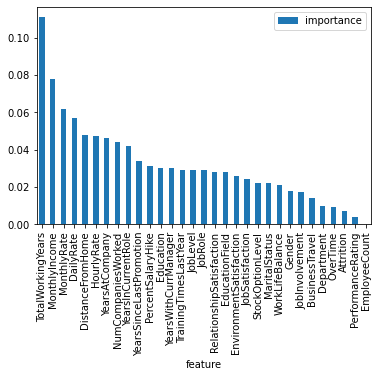

In [ ]:
#Visualize the importance
importances.plot.bar()

### Gráficos explicativos relacionados às variáveis importantes

# Teste com outros modelos supervisionados

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [ ]:
for a,b in zip([lr,dt,knn,rm,gnb],["Logistic Regression","Decision Tree","KNN","Random Forest","Naive Bayes"]):
    a.fit(X_train,Y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(Y_train,prediction)
    score=accuracy_score(Y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.202359
[Logistic Regression] test data accuracy is : 0.057065
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.038043
[KNN] training data accuracy is : 0.362069
[KNN] test data accuracy is : 0.043478
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.051630
[Naive Bayes] training data accuracy is : 0.085299
[Naive Bayes] test data accuracy is : 0.032609


In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,Y_test),
             'KNN classifier':knn.score(X_test,Y_test),
             
             'Random forest':rm.score(X_test,Y_test),
              'Decision tree':dt.score(X_test,Y_test),
              'Naive Bayes':gnb.score(X_test,Y_test)
             }
model_scores

{'Logistic Regression': 0.057065217391304345,
 'KNN classifier': 0.043478260869565216,
 'Random forest': 0.051630434782608696,
 'Decision tree': 0.03804347826086957,
 'Naive Bayes': 0.03260869565217391}

In [ ]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(Y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         3
           2       1.00      0.50      0.67         2
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        12
           8       0.07      0.14      0.10         7
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        16
          12       0.12      0.18      0.15        11
          13       0.22      0.09      0.12        23
          14       0.09      0.12      0.11        16
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00        27
          17       0.04    

c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(Y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.50      0.14      0.22         7
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        14
          10       0.17      0.11      0.13         9
          11       0.08      0.19      0.11        16
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        23
          14       0.09      0.06      0.07        16
          15       0.11      0.08      0.10        12
          16       0.17      0.11      0.13        27
          17       0.04    

c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lanur\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Random forest,Decision tree,Naive Bayes
accuracy,0.057065,0.043478,0.05163,0.038043,0.032609


## Feature Importance

### Logistic Regression

In [ ]:
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Age': 0.0996238146214069,
 'Attrition': -0.14724063077381266,
 'BusinessTravel': -0.04469558708392082,
 'DailyRate': 0.07634806587881497,
 'Department': -0.07630443720140669,
 'DistanceFromHome': -0.04212362943290737,
 'Education': -0.027787693344097843,
 'EducationField': 0.0,
 'EmployeeCount': -0.003556372815030608,
 'EnvironmentSatisfaction': -0.05394153285218087,
 'Gender': 0.08050248175522648,
 'HourlyRate': 0.04543212938442333,
 'JobInvolvement': 0.09483488280340407,
 'JobLevel': -0.0446743723554141,
 'JobRole': 0.08411939800307765,
 'JobSatisfaction': 0.09641741634494941,
 'MaritalStatus': -0.1846824734004395,
 'MonthlyIncome': 0.01650332960793976,
 'MonthlyRate': -0.08943892575498731,
 'NumCompaniesWorked': -0.00936907398897484,
 'OverTime': -0.04631959549809723,
 'PercentSalaryHike': -0.019697061323185366,
 'PerformanceRating': 0.06909964655468867,
 'RelationshipSatisfaction': -0.06726012779759753,
 'StockOptionLevel': -0.05974367510593157,
 'TotalWorkingYears': -0.053023493

<AxesSubplot:title={'center':'Feature Importance'}>

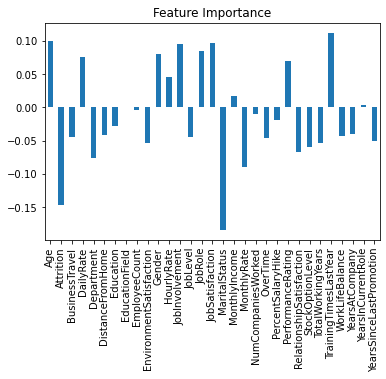

In [ ]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")